## EDA (Retail) on Sample Super Store

The Sparks Foundation(TSF): Graduate Rotational Internship Program (GRIP JAN-2022)

###### Overview

In the given data-set of Superstore, we can see that it has wide presence across the US. They deals with Furniture, Office Supplies and Technology products and primarily sell their products in three segment i.e. COnsumer , Corporate and Home Offices. Also, the data-set contains some valuable numerical data such as Sales, Profit, Quantity, Discount and also some important Categorical data such as Segment, Category , sub-category , ship Mode etc.

###### Goal:-

Our task is to find out the weak areas where we can work further to make more profit and we also have to look for other Business Problems where there is a room for improvement.

###### Methdologies

Here, we will be analysing the dataset by the help of certain libraries of Python such as Pandas ,Numpy, Seaborn and Matplotlib,

Importing necessary files for Analysis

In [388]:
#[NB! I have saved this libraries in my PC's Notepad becasuse it is so handy and easy to pull in whenever you want.] 

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline


In [345]:
# Reading the .CSV data
df = pd.read_csv(r'C:\Users\Himanshu Nautiyal\Downloads\TSF\SampleSuperstore.csv')
# top 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.91
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.58
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.87
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.03
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.52


In [346]:
# Bottom 05 Rows 
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.10
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.63
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.39
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.32
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.95


In [347]:
# Count the number of Rows and Columns 
df.shape

(9994, 13)

In [348]:
# information of the Data-set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


There are 9,994 rows and 13 columns. Data type seems correct 

In [349]:
# look for all columns with "for Loop" 

for col in df.columns:
    print(col)

Ship Mode
Segment
Country
City
State
Postal Code
Region
Category
Sub-Category
Sales
Quantity
Discount
Profit


# Data Cleaning

#### Now we are looking for Null values in the dataset 

In [350]:
#(If we want Total Number of Null values without Boolean value i.e. True and False)
df.isnull().sum().to_frame("Null Values")

,Null Values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [363]:
# Check for Duplicates with duplicated() method
df.duplicated().sum()

17

###### There are 17 duplicate Rows , let's look for those...

In [364]:
# Show the duplicated rows
df[df.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.33
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.63
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.44
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.44
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.44
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.78
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.22
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.33
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.09
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.06


In [378]:
# Drop the duplicated rows
df.drop_duplicates(inplace = True)
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.91
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.58
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.87
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.03
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.10
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.63
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.39
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.32


In [365]:
# Remove Duplicate values
df1= df.drop_duplicates()

In [366]:
df1.shape

(9977, 13)

###### As there is No other "Country" in the given data-set, we can DROP "Country" and "Postal Code" from our dataset.

In [383]:
# dropping Unnecessary columns 
df1 =df.drop(columns=['Country','Postal Code'], axis = 1)
df1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.91
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.58
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.87
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.03
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.52


###### Calculating Profit on Sales (i.e. Profit Margin%)

In [384]:
df1['Profit%'] = (df1.Profit / df1.Sales) * 100
df2 = df1.round()
df2.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit%
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,262.0,2,0.0,42.0,16.0
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,732.0,3,0.0,220.0,30.0
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,15.0,2,0.0,7.0,47.0
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,958.0,5,0.0,-383.0,-40.0
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.0,2,0.0,3.0,11.0


###### Stats of Data

In [385]:
df2.describe(include = "all")

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit%
count,9977,9977,9977,9977,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,914,1996,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.162875,3.790719,0.085697,28.684975,12.010023
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.724922,2.226657,0.279930,234.453590,46.662510
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,-6600.000000,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,2.000000,0.000000,2.000000,7.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,3.000000,0.000000,9.000000,27.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.000000,5.000000,0.000000,29.000000,36.000000


###### Statistical Analysis

We use df.describe() and assign 'include = 'all' to ensure that all categorical features are included for better analysis.

In [387]:
df2.describe(include = 'all')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit%
count,9977,9977,9977,9977,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,914,1996,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.162875,3.790719,0.085697,28.684975,12.010023
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.724922,2.226657,0.279930,234.453590,46.662510
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,-6600.000000,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,2.000000,0.000000,2.000000,7.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,3.000000,0.000000,9.000000,27.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.000000,5.000000,0.000000,29.000000,36.000000


###### From the above data, we can obtain the under mentioned observaions:-

- If we look for categorical data, we will see the 'Unique' index. Here, we can see that there are 04 Ship Modes, 03 Segments , 04 Regions, 03 Category and 17 Sub-Category for analysis.
- If we look for Numerical data and figures, we should focus on "Top" and "Freq" rows , here we can observe that a). around 60% (59.55) of Shipping Mode is through Std Class, b). 51% of the segment are Cosnumer, c).around 60% of orders are under Office Supplies category and approx 15% are under Binders Sub-Category


If we look for Profit figures:-
- we can see Profit % is -275% which is indicating Loss. We have to look for those particular orders. On a positive note, 75% of the total orders are showing 36% profit.

# EDA

###### 1. Which is the best selling Category amoungst all ?

In [414]:
# sales, profit and Quantity (applying groupby and sort_values method)
category = df2.groupby('Category')['Sales', 'Profit', 'Quantity'].sum()
category.sort_values(by=["Sales"], ascending = False)

,Sales,Profit,Quantity
Category,,,
Technology,836219.0,145434.0,6939
Furniture,741310.0,18414.0,8020
Office Supplies,718806.0,122342.0,22861


please Note: Orders pertaining "Technology" has max sales with max profit with less number items sold.

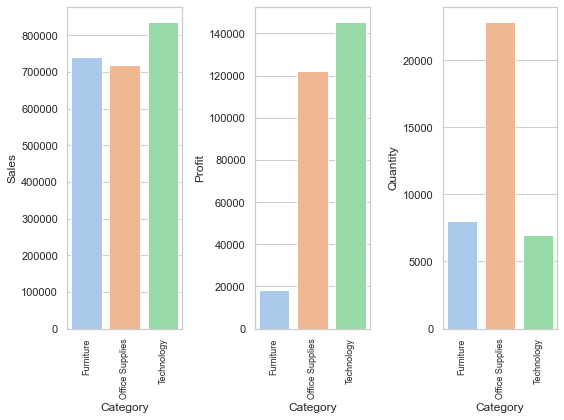

In [436]:
# Plotting Seaborn Bar Graphs for further analysis (https://seaborn.pydata.org/generated/seaborn.set_theme.html)
sns.set_theme(style="whitegrid", palette="pastel")

fig, axis = plt.subplots(1, 3, figsize=(8, 6))

# Plot barplots
c1 = sns.barplot(x = category.index, y = category.Sales,ax=axis[0])
c2 = sns.barplot(x = category.index, y = category.Profit ,ax=axis[1])
c3 = sns.barplot(x = category.index, y = category.Quantity,ax=axis[2])

plt.setp(c1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(c2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(c3.get_xticklabels(), rotation = 'vertical', size = 9)
fig.tight_layout()


Here, we can observe that Furniture sales are satisfactory but Profit is very less. Contrary to that Technology is doing great by selling lessor items comparatively.

###### 2. Which is the best Selling and Profitable Sub-Category ?

In [484]:
# Group by sub-category
subcat = df2.groupby('Sub-Category')['Sales', 'Profit'].sum()
subcat_sales = subcat.sort_values(by=["Sales"], ascending = False)
subcat_sales # Sorting by Sales

,Sales,Profit
Sub-Category,,
Phones,330047.0,44506.0
Chairs,327782.0,26564.0
Storage,223860.0,21277.0
Tables,206967.0,-17734.0
Binders,203421.0,30204.0
Machines,189242.0,3386.0
Accessories,167400.0,41924.0
Copiers,149530.0,55618.0
Bookcases,114879.0,-3479.0


In [485]:
# Sorting by Profit
subcat_profit = subcat.sort_values(by=["Profit"], ascending = False)
subcat_profit 

,Sales,Profit
Sub-Category,,
Copiers,149530.0,55618.0
Phones,330047.0,44506.0
Accessories,167400.0,41924.0
Paper,78220.0,33944.0
Binders,203421.0,30204.0
Chairs,327782.0,26564.0
Storage,223860.0,21277.0
Appliances,107537.0,18132.0
Furnishings,91682.0,13063.0


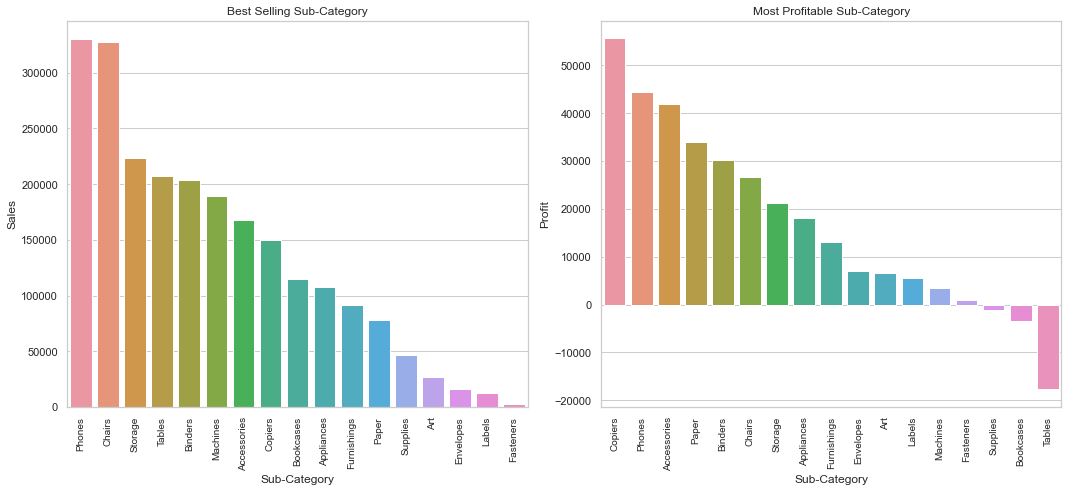

In [512]:
# Understanding from Bar-Graph
sns.set_theme(style="whitegrid")

figure, axis = plt.subplots(1,2, figsize=(15, 7))

# for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

# for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

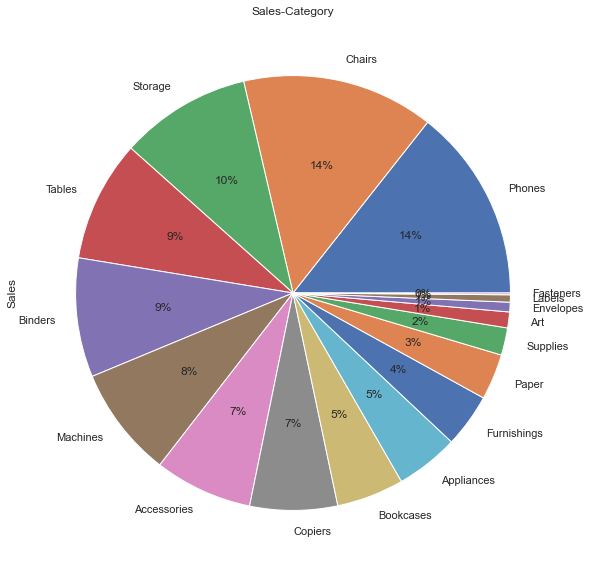

In [531]:
# We can also analyse the sales with the help of Pie-chart.
plt.figure(figsize=(14, 10))
subcat_sales["Sales"].plot(kind = "pie",autopct='%1.0f%%')
plt.title("Sales-Category")

plt.show

We can see that:-
Phones and Chairs are the Top 2 best selling sub-category. (as per Pie-chart 14% each).
Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. Hence, Marketing focus should be on these products.
Also Machines, Fasteners, Supplies, Bookcases and specially Tables make less or negative profit (i.e loss). There are two ways to improvise. Either Stop selling the items making losses or procure more form the supplier on discounted rates to make profit.

###### 3.Which is the Top selling sub-cat Quantity wise?

In [509]:
subcat_quant = df2.groupby('Sub-Category')['Quantity'].sum().to_frame()
sub_q = subcat_quant.sort_values(by=['Quantity'], ascending = False)
sub_q

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


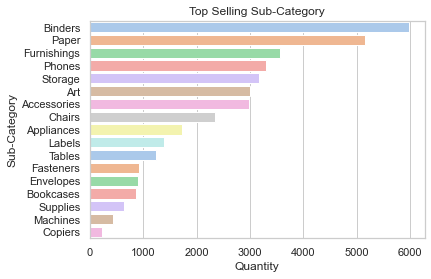

In [526]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = sub_q, y = sub_q.index, x = sub_q.Quantity, palette = "pastel")
plt.title("Top Selling Sub-Category")
plt.show()

###### Here, we can conclude that Bindres are top selling (qauntity wise) sub-category followed by Paper, Furnishers and Phones. Also, it is pertinent to note that despite being most profitable item, only 234 Copiers were sold. Please note, Copiers comes under Furniture & Fixtures and it can be used for few years.   

###### 4. Which is the Most Profitable Segment?

In [527]:
segment = pd.DataFrame(df2.groupby(['Segment'])[['Profit']].sum())
segment

,Profit
Segment,
Consumer,133998.0
Corporate,91936.0
Home Office,60256.0


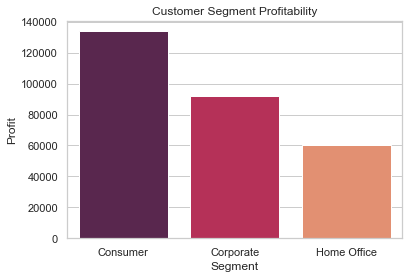

In [529]:
# plotting Bar graph for analysis:- 
sns.barplot(data = segment, x = segment.index, y = segment.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

We can clearly watch that Consumer Segment is the Most Profitable

###### 5. Which is the top Ship Mode?

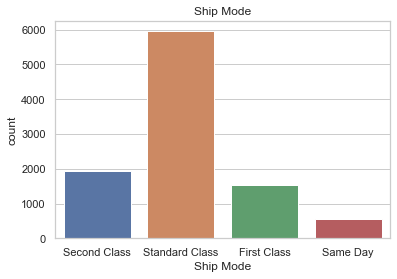

In [532]:
sns.countplot(df2['Ship Mode'])
plt.title("Ship Mode")
plt.show()

from above, i.e. refer to df2.describe(include = 'all') section, we can correlate that Standard Class is the preferred method for shipment.  

###### 6. Which is the Top most Region w.r.t. Profitability?

In [544]:
region = pd.DataFrame(df2.groupby(['Region'])['Profit'].sum())
region

,Profit
Region,
Central,39666.0
East,91505.0
South,46721.0
West,108298.0


<AxesSubplot:xlabel='Region', ylabel='count'>

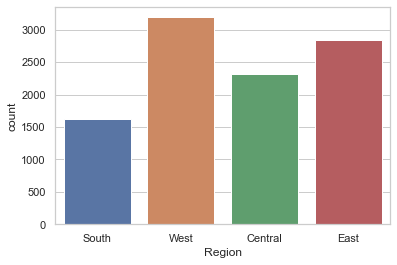

In [545]:
sns.countplot(df2['Region'])

We can say that West region generates max profit.

# OTHER ANALYSIS

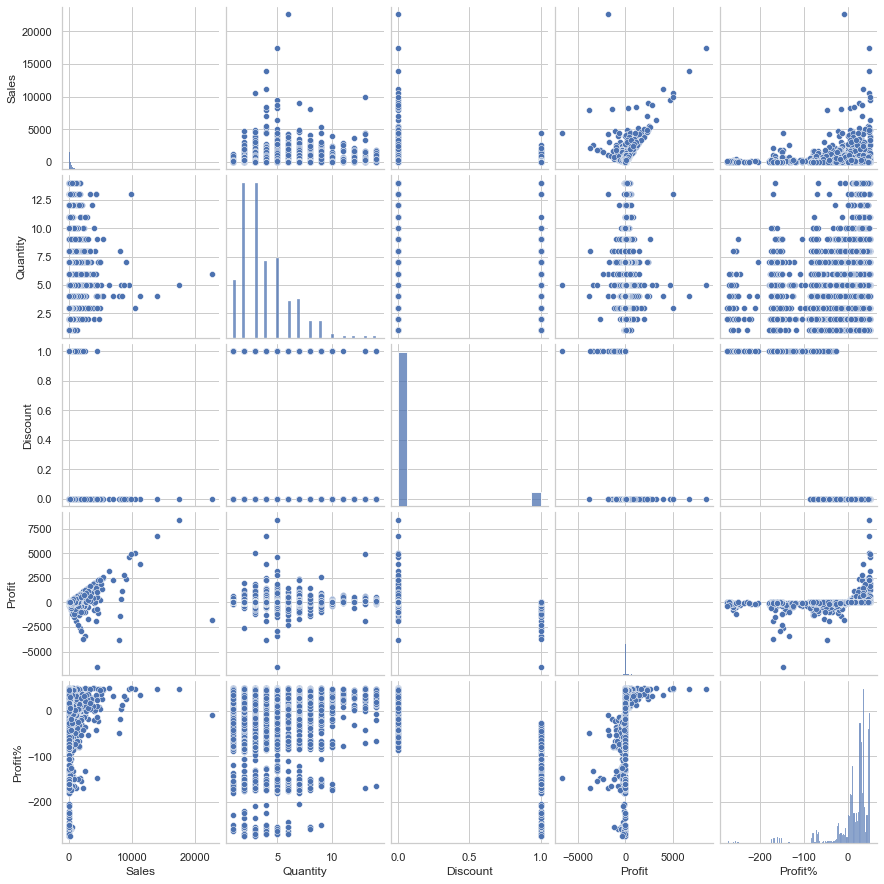

In [513]:
# Let's plot "PairPLOT" , in this we are going to analyze relationship b/w two variables where the variables can be Continuous, Categorical and Booleans as well. 
sns.pairplot(df2)

In [548]:
#Look for Sales Region-Wise

df_region = data1.groupby("Sub-Category", axis = 0).sum()
discount = df_region.sort_values(by=["Discount"], ascending = False)
discount

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Binders,203409.1690,5971,566.20,30227.88
Phones,330007.0540,3289,137.40,44516.25
Furnishings,91683.0240,3560,132.40,13052.83
Chairs,327777.7610,2351,104.70,26567.11
Paper,78224.1420,5144,101.80,33944.02
Tables,206965.5320,1241,83.35,-17725.59
Appliances,107532.1610,1729,77.60,18138.07
Storage,223843.6080,3158,63.20,21279.05
Accessories,167380.3180,2976,60.80,41936.78


###### 7.Which sub-Category has the highest Discount?

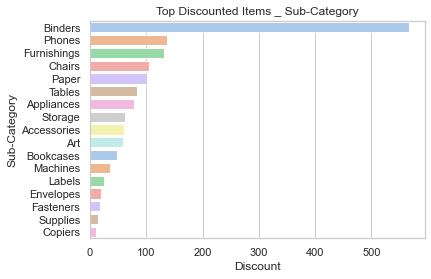

In [563]:
sns.set_theme(style="whitegrid")
sns.barplot(data = discount, y = discount.index, x = discount.Discount, palette = "pastel")
plt.title("Top Discounted Items _ Sub-Category")
plt.show()

From here, we can't completely say that giving high discounts affects the Profit. For instance, Binders are the most discounted one and also comes under Top 05 Profitable items. 

###### 7.Top 10 cities with Highest Number of Sales?

In [566]:
sales = pd.DataFrame(df2.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
top10 = sales[:10]
top10

,Sales,Quantity
City,,
New York City,256345.0,3413
Los Angeles,175837.0,2876
Seattle,119472.0,1578
San Francisco,112597.0,1920
Philadelphia,109069.0,1978
Houston,64440.0,1460
Chicago,48536.0,1129
San Diego,47521.0,670
Jacksonville,44712.0,429


In [570]:
bottom_10 = sales[-10:]
bottom_10

,Sales,Quantity
City,,
Missouri City,6.0,7
Keller,6.0,2
Layton,5.0,4
San Luis Obispo,4.0,2
Springdale,4.0,2
Ormond Beach,3.0,3
Pensacola,2.0,3
Jupiter,2.0,1
Elyria,2.0,1


###### As a business Manager, I have made some recommedations to make the SuperStore Business More lucrative. There are:- 

- Focus on Technology sub-category.
- Phones and Chairs are the Top 2 best selling sub-category. Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. Hence, Marketing focus should be on these products.
- Consumer and Corporate Segment have more than 70% of customer-base. 
- For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
- Target Consumer from Regions East and West both.

Thank You.